# Week 5: Modules and packages

1. Review last week's challenge + any questions to answer
2. What are modules?  What can they contain?
3. The `import` statement
4. (A little bit about) developing a module
5. Python's standard library (i.e., the modules that come with Python)
6. Modules vs. packages
7. Intro to PyPI
8. Using `pip` and downloading/installing modules

In [2]:
# what is the walrus operator, why do we care, and how do we use it?

# start with a simple loop

while True:
    name = input('Enter your name: ').strip()
    
    if name == '':  # did we get an empty string?  If so, then leave the loop
        break
        
    print(f'Hello, {name}!')

Enter your name: Reuven
Hello, Reuven!
Enter your name: 


In [3]:
# another way to check for an empty string
# empty strings are considered False in an if/while
# all other strings are considered True in an if/while

while True:
    name = input('Enter your name: ').strip()
    
    if name:   # did we get a non-empty string?
        print(f'Hello, {name}!')
    else:      # did we get an empty string?
        break

Enter your name: Reuven
Hello, Reuven!
Enter your name: world
Hello, world!
Enter your name: asdfsafas
Hello, asdfsafas!
Enter your name: 


In [4]:
# rewrite this once again...

while True:
    name = input('Enter your name: ').strip()
    
    if not name:   # '' (empty string) is False next to an if
        break       #  again, this means: break if we have an empty string

    print(f'Hello, {name}!')


Enter your name: asdfa
Hello, asdfa!
Enter your name: asdfa
Hello, asdfa!
Enter your name: 


In [5]:
# can we rewrite things to be shorter?

# while looks to its right (like if) and looks for a True/False value
# if all goes well, then in the below code:

# (1) with each iteration, we get the user's name
# (2) we strip it of whitespace
# (3) we assign the value to name
# (4) "while" looks to its right -- empty string? stop. non-empty string? run the loop block


while name = input('Enter your name: ').strip():
    
    print(f'Hello, {name}!')

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1395544256.py, line 12)

In [6]:
# the walrus operator, :=  (looks like a walrus if you turn your head 90 degrees to the left)
# this operator does two things:

# (1) everything = does
# (2) returns a value

# now our while loop looks to its right, and it *DOES* get a value back

while name := input('Enter your name: ').strip():
    
    print(f'Hello, {name}!')

Enter your name: Reuven
Hello, Reuven!
Enter your name: asdfafd
Hello, asdfafd!
Enter your name: 


In [7]:
s = ''  # empty string

if s:  # putting s (the string) in a "boolean context," in an "if" or "while"
    print('True-ish')
else:
    print('False-ish')

False-ish


In [9]:
s = ''  # empty string

if not s:  # putting s (the string) in a "boolean context," in an "if" or "while"
    print('Yes, it is empty!')
else:
    print('No, it is not empty!')

Yes, it is empty!


# Python Skills Challenge: Functions

In this challenge, you are to write a function `count_ips`. The function will take a single argument, a string naming a logfile from a Web server.  The function will return a Python dict, in which the keys are IP addresses from the file, and the values represent the number of times each IP address made a request from the site.

Here are the first few lines from the sort of logfile the function should expect:

```
67.218.116.165 - - [30/Jan/2010:00:03:18 +0200] "GET /robots.txt HTTP/1.0" 200 99 "-" "Mozilla/5.0 (Twiceler-0.9 http://www.cuil.com/twiceler/robot.html)"
66.249.71.65 - - [30/Jan/2010:00:12:06 +0200] "GET /browse/one_node/1557 HTTP/1.1" 200 39208 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
65.55.106.183 - - [30/Jan/2010:01:29:23 +0200] "GET /robots.txt HTTP/1.1" 200 99 "-" "msnbot/2.0b (+http://search.msn.com/msnbot.htm)"
65.55.106.183 - - [30/Jan/2010:01:30:06 +0200] "GET /browse/one_model/2162 HTTP/1.1" 200 2181 "-" "msnbot/2.0b (+http://search.msn.com/msnbot.htm)"
66.249.71.65 - - [30/Jan/2010:02:07:14 +0200] "GET /browse/browse_applet_tab/2593 HTTP/1.1" 200 10305 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
```

Notice that each line of the file starts with an IP address, and then has (among other things) the timestamp at which the request was made, the actual request, and an indication of what browser was used to make the request.

If the file is empty, then the returned dictionary should be empty.

This Katacoda challenge system will test your function against a file, `logfile.txt`, that is in the current `/root` directory. When the function returns the correct values, you will see an indication of this.

Good luck!


In [10]:
# write a function, called count_ips
# function's sole parameter is "filename", name of a logfile
# function will output a dictionary 
#    keys in the dict will be strings (IP addresses)
#    values in the dict will be counts -- how many times the address appears

In [19]:
def count_ips(filename):
    output = {}                    # output is a local variable in the "count_ips" function
    
    for one_line in open(filename):
        fields = one_line.split()  # turn each line from the file into a list of strings
        ip_address = fields[0]     # grab the first field on the line, the IP address

        if ip_address in output:   # have we seen this IP address before?
            output[ip_address] += 1
        else:
            output[ip_address] = 1     # first time seeing this IP, we'll assign 1
    
    return output

In [22]:
# run the function against the file
d = count_ips('mini-access-log.txt')

# d is a dict, so I can run "items" on it, and iterate over keys and values
for key, value in d.items():
    print(f'{key}:\t{value}')

67.218.116.165:	2
66.249.71.65:	3
65.55.106.183:	2
66.249.65.12:	32
65.55.106.131:	2
65.55.106.186:	2
74.52.245.146:	2
66.249.65.43:	3
65.55.207.25:	2
65.55.207.94:	2
65.55.207.71:	1
98.242.170.241:	1
66.249.65.38:	100
65.55.207.126:	2
82.34.9.20:	2
65.55.106.155:	2
65.55.207.77:	2
208.80.193.28:	1
89.248.172.58:	22
67.195.112.35:	16
65.55.207.50:	3
65.55.215.75:	2


In [24]:
from friendly.jupyter import Friendly

# DRY -- don't repeat yourself!

1. If I have several lines in a row that are basically the same, I can DRY them up by using a loop.
2. If I have the same code repeated several times across my program, I can DRY them up by using a function.
3. If I have the same code repeated across SEVERAL DIFFERENT PROGRAMS, then I can use a "library." 

A library is a collection of functions and data that you can reuse, and avoid re-inventing the wheel.

Anyone can write a library:
- You can write a library with commonly used functions and data
- Your group at work might write a library to handle common tasks, functionality, file types
- Your company might supply standard libraries for everyone to use for standard tasks (e.g., logging into the security system, or working with file types, or accessing the database)
- Your software vendors might supply libraries that allow you access to their files, functionality, security, etc.
- Your operating system is basically a bunch of libraries, which you can use from your program to communicate with the disk, printer, network, etc.

In Python, we call libraries "modules."  And modules are extremely common, and extremely handy.

# We use `import` to make use of a module

The `import` statement is very common in Python, because it lets us load a module into memory and make use of its functions and data.

If I want a random number, I can use the `import` statement to load the `random` module. In the `random` module, we have a bunch of different functions that have to do with random numbers.

In [25]:
import random

# Things to notice about `import`

1. It's not a function.  We don't use `()` around its argument.  It's a statement that has a single word after it.
2. In many languages, we indicate which file we want to load. Not in Python! We indicate what module we want to load, and based on that, Python tries to find the file and load it.
3. After the module is loaded, you can access all of the module's functionality with the module's name and a dot `.`.  

In [26]:
# now that I've said "import random", "random" is a variable defined in my system
type(random)  # what kind of object does it contain?

<class 'module'>

In [27]:
# what names are available after the . when I use random?
# I can find out by running the "dir" function on random

dir(random)   # this gives me a list of strings -- what names are available

[
│   'BPF',
│   'LOG4',
│   'NV_MAGICCONST',
│   'RECIP_BPF',
│   'Random',
│   'SG_MAGICCONST',
│   'SystemRandom',
│   'TWOPI',
│   '_ONE',
│   '_Sequence',
│   '_Set',
│   '__all__',
│   '__builtins__',
│   '__cached__',
│   '__doc__',
│   '__file__',
│   '__loader__',
│   '__name__',
│   '__package__',
│   '__spec__',
│   '_accumulate',
│   '_acos',
│   '_bisect',
│   '_ceil',
│   '_cos',
│   '_e',
│   '_exp',
│   '_floor',
│   '_index',
│   '_inst',
│   '_isfinite',
│   '_log',
│   '_os',
│   '_pi',
│   '_random',
│   '_repeat',
│   '_sha512',
│   '_sin',
│   '_sqrt',
│   '_test',
│   '_test_generator',
│   '_urandom',
│   '_warn',
│   'betavariate',
│   'choice',
│   'choices',
│   'expovariate',
│   'gammavariate',
│   'gauss',
│   'getrandbits',
│   'getstate',
│   'lognormvariate',
│   'normalvariate',
│   'paretovariate',
│   'randbytes',
│   'randint',
│   'random',
│   'randrange',
│   'sample',
│   'seed',
│   'setstate',
│   'shuffle',
│   'triangular',
│   'uniform',
│   'vonmisesvariate',
│   'weibullvariate'
]

In [28]:
# once I've loaded random, I can invoke the random.randint function on it:
random.randint(0, 100)

100

In [29]:
random.randint(0, 100)

46

In [30]:
random.choice('abcde')

'e'

In [31]:
random.choice('abcde')

'd'

In [32]:
# if you want to know more about a function, you can
# (a) look up the documentation on python.org
# (b) if you're in Jupyter, you can run the "help" function on the function you want

help(random.shuffle)

Help on method shuffle in module random:

shuffle(x, random=None) method of random.Random instance
    Shuffle list x in place, and return None.
    
    Optional argument random is a 0-argument function returning a
    random float in [0.0, 1.0); if it is the default None, the
    standard random.random will be used.



In [33]:
mylist = [10, 20, 30, 40, 50]
random.shuffle(mylist)

mylist

[40, 50, 20, 30, 10]

In [34]:
?random.choice

In [35]:
random.choice??

In [36]:
import glob   # glob is a module that lets us find patterns of filenames, e.g., *.txt

In [37]:
glob.glob('*.txt')    # module glob, function glob

[
│   'mini-access-log.txt',
│   'nums.txt',
│   'mydict.txt',
│   'mynewfile.txt',
│   'shoe-data.txt',
│   'linux-etc-passwd.txt',
│   'wcfile.txt',
│   'myfile.txt'
]

In [38]:
# Write a function, file_length, that takes a filename and returns the length

def file_length(filename):
    total = 0    
    
    for one_line in open(filename):    # go over the file, one line at a time
        total += len(one_line)         # add the current line's length to total
        
    return total      

In [39]:
file_length('nums.txt')

42

In [40]:
file_length('mynewfile.txt')

30

In [41]:
file_length('linux-etc-passwd.txt')

2683

In [42]:
# I can combine my new friend, glob.glob, with my new function, file_length:

for one_filename in glob.glob('*.txt'):   # for each *.txt file in the current directory
    l = file_length(one_filename)
    print(f'{one_filename}:\t{l}')

mini-access-log.txt:	36562
nums.txt:	42
mydict.txt:	18
mynewfile.txt:	30
shoe-data.txt:	1676
linux-etc-passwd.txt:	2683
wcfile.txt:	165
myfile.txt:	30


In [43]:
!ls -l *.txt

-rw-r--r-- 1 reuven staff  2683 Mar 13  2016 linux-etc-passwd.txt
-rw-r--r-- 1 reuven staff 36562 Aug  8  2014 mini-access-log.txt
-rw-r--r-- 1 reuven staff    18 Jan 20 22:48 mydict.txt
-rw-r--r-- 1 reuven staff    30 Jan 20 22:35 myfile.txt
-rw-r--r-- 1 reuven staff    30 Jan 20 22:39 mynewfile.txt
-rw-r--r-- 1 reuven staff    42 Sep 19  2017 nums.txt
-rw-r--r-- 1 reuven staff  1676 Dec 14  2014 shoe-data.txt
-rw-r--r-- 1 reuven staff   165 Nov 19  2013 wcfile.txt


# Exercise: Pick a random character

1. Use `glob.glob` to find all of the text files in the current directory (like I did).
2. Go through each filename in a `for` loop.
3. Open each file, and go through each line, one at a time.
4. Use `random.randint` to choose a random character from that line.  Meaning: Calculate the length of the line with `len`, and then run `random.randint` to get a random number up to that.
5. Print the filename, the number, and the character at that location in the file.

Hints:
- `glob.glob('*.txt')` -- returns a list of strings (filenames)
- `random.randint(0, 100)` -- returns a random integer from 0 - 100
- Don't forget to `import` each of the two modules we're using here.

In [44]:
!ls -l linux-etc-passwd.txt

-rw-r--r-- 1 reuven staff 2683 Mar 13  2016 linux-etc-passwd.txt


In [49]:
import glob
import random

for one_filename in glob.glob('*.txt'):    # go through each filename in the current directory
    for one_line in open(one_filename):    # go through each line in each file
        n = random.randint(0, len(one_line)-1)  # get a character index for the current line
        print(f'{one_filename}\t{n}\t{one_line[n]}')

mini-access-log.txt	96	.
mini-access-log.txt	100	z
mini-access-log.txt	70	.
mini-access-log.txt	21	/
mini-access-log.txt	32	:
mini-access-log.txt	27	1
mini-access-log.txt	71	"
mini-access-log.txt	137	 
mini-access-log.txt	112	5
mini-access-log.txt	46	"
mini-access-log.txt	69	1
mini-access-log.txt	15	 
mini-access-log.txt	102	b
mini-access-log.txt	108	l
mini-access-log.txt	113	 
mini-access-log.txt	120	a
mini-access-log.txt	102	"
mini-access-log.txt	134	e
mini-access-log.txt	100	"
mini-access-log.txt	78	 
mini-access-log.txt	80	 
mini-access-log.txt	135	m
mini-access-log.txt	125	l
mini-access-log.txt	147	t
mini-access-log.txt	22	a
mini-access-log.txt	103	 
mini-access-log.txt	38	6
mini-access-log.txt	111	o
mini-access-log.txt	130	o
mini-access-log.txt	68	T
mini-access-log.txt	53	r
mini-access-log.txt	150	w
mini-access-log.txt	117	b
mini-access-log.txt	170	

mini-access-log.txt	163	t
mini-access-log.txt	14	 
mini-access-log.txt	25	2
mini-access-log.txt	38	 
mini-access-log.txt	159	g
mini

# Next up:

1. Different forms of `import`
2. Where Python loads modules from
3. How to write our own module


In [53]:
import glob
import random

filenames = glob.glob('/etc/*.conf')
print(f'There are {len(filenames)} files in the current directory')
for one_filename in filenames:    # go through each filename in the current directory
    for one_line in open(one_filename):    # go through each line in each file
        n = random.randint(0, len(one_line)-1)  # get a character index for the current line
        print(f'{one_filename}\t{n}\t{one_line[n]}')

There are 16 files in the current directory
/etc/syslog.conf	38	f
/etc/syslog.conf	0	

/etc/syslog.conf	21	.
/etc/rtadvd.conf	57	p
/etc/rtadvd.conf	0	#
/etc/rtadvd.conf	48	a
/etc/rtadvd.conf	42	s
/etc/rtadvd.conf	41	o
/etc/rtadvd.conf	0	#
/etc/rtadvd.conf	17	d
/etc/rtadvd.conf	1	 
/etc/rtadvd.conf	18	r
/etc/rtadvd.conf	0	

/etc/rtadvd.conf	15	 
/etc/rtadvd.conf	0	#
/etc/rtadvd.conf	6	t
/etc/rtadvd.conf	53	h
/etc/rtadvd.conf	13	,
/etc/rtadvd.conf	61	 
/etc/rtadvd.conf	36	k
/etc/rtadvd.conf	1	

/etc/rtadvd.conf	0	#
/etc/rtadvd.conf	6	r
/etc/pf.conf	1	

/etc/pf.conf	3	e
/etc/pf.conf	0	#
/etc/pf.conf	43	h
/etc/pf.conf	28	e
/etc/pf.conf	2	e
/etc/pf.conf	6	i
/etc/pf.conf	14	o
/etc/pf.conf	1	

/etc/pf.conf	54	o
/etc/pf.conf	28	 
/etc/pf.conf	41	e
/etc/pf.conf	1	 
/etc/pf.conf	8	s
/etc/pf.conf	1	

/etc/pf.conf	13	(
/etc/pf.conf	1	

/etc/pf.conf	0	

/etc/pf.conf	1	

/etc/pf.conf	20	o
/etc/pf.conf	1	

/etc/pf.conf	16	m
/etc/pf.conf	10	 
/etc/pf.conf	23	"
/etc/pf.conf	29	

/etc/pf.conf	2	c
/etc/p

PermissionError: [Errno 13] Permission denied: '/etc/AFP.conf'

More ...

Traceback (most recent call last):                                                                  
  Code block [53], line 7, in <module>                                                              
    for one_line in open(one_filename):    # go through each line in each file                      
PermissionError: [Errno 13] Permission denied: '/etc/AFP.conf'                                      

Friendly-traceback does not know the cause of this error.

what()

An exception of type PermissionError is a subclass of OSError. An     
OSError exception is usually raised by the Operating System to        
indicate that an operation is not allowed or that a resource is not   
available.

why()

No information is known about this exception. Please report this      
example to                                                            
https://github.com/friendly-traceback/friendly-traceback/issues/new If
you are using a REPL, use www('bug') to do so.                        

If you are using the Friendly console, use www() to do an Internet    
search for this particular case.

where()

Exception raised on line 7 of code block [53].                                                      

       4: filenames = glob.glob('/etc/*.conf')                                                      
       5: print(f'There are {len(filenames)} files in the current directory')                       
       6: for one_filename in filenames:    # go through each filename in the current directory     
    -->7:     for one_line in open(one_filename):    # go through each line in each file            
                              ^^^^^^^^^^^^^^^^^^                                                    
       8:         n = random.randint(0, len(one_line)-1)  # get a character index for the current   
line                                                                                                

    one_filename:  '/etc/AFP.conf'                                                                  
    open:  <builtin function open>                                                                  

In [54]:
import random
random.randint(0, 100)  

83

In [55]:
random.randint(0, 50)

8

In [57]:
# Isn't it a pain to always say random.randint?
# wouldn't it be nice if I could just say randint(0, 100)?

randint(0, 100)

NameError: name 'randint' is not defined

More ...

Traceback (most recent call last):                                                                  
  Code block [57], line 4, in <module>                                                              
    randint(0, 100)                                                                                 
NameError: name 'randint' is not defined                                                            

Did you forget to add random.?

what()

A NameError exception indicates that a variable or function name is   
not known to Python. Most often, this is because there is a spelling  
mistake. However, sometimes it is because the name is used before     
being defined or given a value.

why()

In your program, no object with the name randint exists.              

The local object random has an attribute named randint. Perhaps you   
should have written random.randint instead of randint.                

randint is a name found in module random. Perhaps you forgot to write 

from random import randint                                            

where()

Exception raised on line 4 of code block [57].                                                      

       1: # Isn't it a pain to always say random.randint?                                           
       2: # wouldn't it be nice if I could just say randint(0, 100)?                                
    -->4: randint(0, 100)                                                                           
          ^^^^^^^                                                                                   

In [58]:
# when we say 

random.randint(0, 100)

# Python is

# (1) finding the "random" variable
# (2) asking random if it has a "randint" attribute (i.e., name after the dot)
# (3) If so, it retrieves that attribute
# (4) that attribute is actually a function
# (5) run the function with arguments 0, 100

80

In [59]:
# If I just say 

randint(0, 100)

# Python says: I don't have a variable "randint" and stops with an error

NameError: name 'randint' is not defined

More ...

Traceback (most recent call last):                                                                  
  Code block [59], line 3, in <module>                                                              
    randint(0, 100)                                                                                 
NameError: name 'randint' is not defined                                                            

Did you forget to add random.?

what()

A NameError exception indicates that a variable or function name is   
not known to Python. Most often, this is because there is a spelling  
mistake. However, sometimes it is because the name is used before     
being defined or given a value.

why()

In your program, no object with the name randint exists.              

The local object random has an attribute named randint. Perhaps you   
should have written random.randint instead of randint.                

randint is a name found in module random. Perhaps you forgot to write 

from random import randint                                            

where()

Exception raised on line 3 of code block [59].                                                      

       1: # If I just say                                                                           
    -->3: randint(0, 100)                                                                           
          ^^^^^^^                                                                                   

In [60]:
# what I'd like is a way to shorten my code by just being able to write "random(0, 100)"
# the way we can do that is with "from .. import"

# this means:
# (1) find the module "random"
# (2) find, in that module, the name "randint"
# (3) define a new variable "randint" that refers to random.randint
# NOTE: when we do this, "random" is *NOT* defined.  (But we defined it earlier, so we're OK)

from random import randint

In [61]:
# now randint *is* defined as a variable (function)
# so we can run it

randint(0, 100)

75

In [62]:
# what's the advantage of using from .. import?
# you can write less code.  You don't need to use the full name (module.function) every time
# you want to run the function

In [63]:
# An example: I often use the "pandas" library for data analyze
# I often say:

from pandas import Series, DataFrame   # notice -- two names, separated by commas


# Ways to `import` (so far)

1. `import MODNAME` 
2. `from MODNAME import NAME1`
3. `from MODNAME import NAME1, NAME2`

In [64]:
# what if I want to import a module, but its name is long, complex, hard to spell, etc?
# I want to import it, but I want to determine its name

import random as r   # the "as" tells Python what to name the module when we load it

In [65]:
# everyone, but *everyone* in the data science world says:

import numpy as np   # if you're using NumPy

In [66]:
import pandas as pd  # everyone using pandas does this, too

In [67]:
# along these lines, you can also say:

# meaning: go to the random module, find the randint function, and import it *but* alias it to ri
from random import randint as ri

# Ways to `import` (so far)

1. `import MODNAME` 
2. `from MODNAME import NAME1`
3. `from MODNAME import NAME1, NAME2`
4. `import MODNAME as ALIAS`
5. `from MODNAME import NAME1 as ALIAS1`

You can also say:

```python
from random import * 
```

### Please, please, *please*, don't ever do this in your programs.

What this means is:
1. Find the module `random`
2. Go through each name defined in the module.
3. Define that name as a variable outside of the module, in your program.

This has practical problems and philosophical problems:

1. Practically, this means that if you and the module both use the same variable name, one of those variables is no longer available.
2. Philosophically, this means that you don't want to use namespaces -- to keep names separate.

# What is Python loading? Where are modules located?

When we say `import modname`, what is Python doing?

Simply put: It's loading the file `modname.py`.  It's looking for that file on your disk.

Where is it looking?  In its search path -- a bunch of directories and files that it's configured to look at.  We can look at the search path, which is in `sys.path`.  (In the `sys` module, the `path` variable.)

In [68]:
import sys
sys.path  # this is the list of directories where Python looks for modules

[
│   "/Users/reuven/Courses/Current/O'Reilly-2022-q1",
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
│   '',
│   '/usr/local/lib/python3.10/site-packages',
│   '/usr/local/Cellar/pybind11/2.9.0/libexec/lib/python3.10/site-packages',
│   '/usr/local/lib/python3.10/site-packages/IPython/extensions',
│   '/Users/reuven/.ipython'
]

# When I say `import`...

Python goes through each directory in `sys.path`, looking for our module name + `.py`.



In [69]:
random  

<module 'random' from '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/random.py'>

# Modifying `sys.path`.

The best way to do this is by setting `PYTHONPATH`, an environment variable, before Python starts up.  Any value(s) there will be added to `sys.path` at startup.

```
Python 3.10.1 (main, Dec  6 2021, 23:20:29) [Clang 13.0.0 (clang-1300.0.29.3)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> import sys
>>> for one_dirname in sys.path:
...     print(one_dirname)
...

/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python310.zip
/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10
/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload
/usr/local/lib/python3.10/site-packages
/usr/local/Cellar/pybind11/2.9.0/libexec/lib/python3.10/site-packages
>>>
[ ~/Desktop]$ export PYTHONPATH='/foo/bar:/my/favorite/directory'
[ ~/Desktop]$ python3
Python 3.10.1 (main, Dec  6 2021, 23:20:29) [Clang 13.0.0 (clang-1300.0.29.3)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> import sys
>>> for one_dirname in sys.path:
...     print(one_dirname)
...

/foo/bar
/my/favorite/directory
/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python310.zip
/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10
/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload
/usr/local/lib/python3.10/site-packages
/usr/local/Cellar/pybind11/2.9.0/libexec/lib/python3.10/site-packages
>>>
```

In [70]:
random


<module 'random' from '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/random.py'>

In [71]:
# the "os" module is all about the operating system -- especially connecting with files on the disk

import os

In [72]:
# run os.stat to get some basic information about a file on the disk (filesystem)
os.stat('/etc/passwd')

os.stat_result(st_mode=33188, st_ino=17454971, st_dev=16777221, st_nlink=1, st_uid=0, st_gid=0, st_size=7630, st_atime=1634704084, st_mtime=1577865600, st_ctime=1634704084)

In [74]:
file_info = os.stat('/etc/passwd')  # get the stat info into "file_info"
file_info.st_size   # size of the file, in bytes

7630

In [75]:
os.path.exists('/etc/passwd')

True

In [76]:
os.path.exists('/etc/passwdasdfasfafas')

False

# Exercise: File length

1. Load the `os` module.
2. Ask the user to enter a filename.
3. Using `os.path.exists`, check if the file exists.
4. If so, then get the file's length with `os.stat`, printing the `st_size` attribute of the stat's object.
5. If not, then scold the user, telling them the file doesn't exist.

In [82]:
import os   # or: from os import exists, stat

filename = input('Enter a filename: ').strip()

if os.path.exists(filename):
    file_info = os.stat(filename)  # get all file info via os.stat
    size = file_info.st_size       # get the size from .st_size
    print(f'Size of {filename} is {size}.')
else:
    print(f'{filename} does not exist.')

Enter a filename: asdfasdfsafdafda
asdfasdfsafdafda does not exist.


# Writing a module

A module is a Python program, stored in `sys.path`, with a `.py` extension (suffix).  You can use many different editors to create a Python program. Two very popular ones are:

- PyCharm
- VSCode (with the Python plugin)

I wrote `mymod.py`, and saved it in the same directory as Jupyter. That puts it in my Jupyter notebook's `sys.path`.  I can now say `import mymod`, and have access to all of the data and functions in `mymod`.

In [84]:
import mymod

In [85]:
type(mymod)

<class 'module'>

In [86]:
# how can I see the names of things defined in mymod?
# Use the "dir" function on the module object

dir(mymod)

[
│   '__builtins__',
│   '__cached__',
│   '__doc__',
│   '__file__',
│   '__loader__',
│   '__name__',
│   '__package__',
│   '__spec__',
│   'hello',
│   'x',
│   'y'
]

In [87]:
# I now know that hello, x, and y are all defined on my mod

mymod.x  # get the value of mymod's x

100

In [88]:
mymod.y

[10, 20, 30]

In [89]:
mymod.hello('Reuven')

'Hello, Reuven!'

# Next up:

1. Python standard library (what comes with Python)
2. PyPI 
3. `pip` and installing modules
4. General Q&A -- what next?


In [90]:
dir(mymod)

[
│   '__builtins__',
│   '__cached__',
│   '__doc__',
│   '__file__',
│   '__loader__',
│   '__name__',
│   '__package__',
│   '__spec__',
│   'hello',
│   'x',
│   'y'
]

In [91]:
type(mymod.hello)

<class 'function'>

In [92]:
type(mymod.x)

<class 'int'>

In [93]:
type(mymod.y)

<class 'list'>

In [94]:
help(mymod)  # get documentation on the module

Help on module mymod:

NAME
    mymod

FUNCTIONS
    hello(name)

DATA
    x = 100
    y = [10, 20, 30]

FILE
    /Users/reuven/Courses/Current/O'Reilly-2022-q1/mymod.py




In [95]:
d = {'a':[10, 20, 30], 'b':[100, 200, 300, 400, 500], 'c': 'this is a sample sentence'.split() }

In [96]:
d

{
│   'a': [10, 20, 30],
│   'b': [100, 200, 300, 400, 500],
│   'c': ['this', 'is', 'a', 'sample', 'sentence']
}

In [97]:
import pprint

In [98]:
pprint.pprint(d)

{'a': [10, 20, 30],
 'b': [100, 200, 300, 400, 500],
 'c': ['this', 'is', 'a', 'sample', 'sentence']}


In [100]:
pprint.pp(d)

{'a': [10, 20, 30],
 'b': [100, 200, 300, 400, 500],
 'c': ['this', 'is', 'a', 'sample', 'sentence']}


# Let's read a CSV file!

In [102]:
# in Jupyter, ! means: execute the following in terminal/CSV
# on Unix/Mac, cat means: show me the file
# so !cat means: show me the file now, using the Unix command

!cat languages.csv

Country,FI,SW,DA,NO,EN,GE,DU,FL,FR,IT,SP,PO
Germany,0,0,0,0,21,100,2,1,10,2,1,0
Italy,0,0,0,0,5,3,0,0,11,100,1,0
France,0,2,3,0,10,7,1,1,100,12,7,1
Netherlands,0,0,0,0,41,47,100,100,16,2,2,0
Belgium,0,0,0,0,14,15,0,59,44,2,1,0
Luxemburg,0,0,0,0,31,100,4,1,92,10,0,0
UK,0,0,0,0,100,7,0,0,15,3,2,0
Portugal,0,0,0,0,9,0,0,0,10,1,2,100
Austria,0,0,0,0,18,100,1,1,4,2,1,0
Switzerland,0,0,0,0,21,83,1,2,64,23,3,1
Sweden,5,100,10,11,43,25,0,0,6,1,1,0
Denmark,0,22,100,20,38,36,1,1,10,3,1,0
Norway,0,25,19,100,34,19,0,0,4,1,0,1
Finland,100,23,0,0,12,11,0,0,2,1,0,0
Spain,0,0,0,0,5,1,0,0,11,2,100,0
Ireland,0,0,0,0,100,1,0,0,2,0,0,0


In [103]:
import csv

with open('languages.csv') as csvfile:     # open the file for reading 
    r = csv.reader(csvfile)                # create a new csv.reader object with our file object
    for row in r:                          # iterate over our CSV reader object
        print(row)

['Country', 'FI', 'SW', 'DA', 'NO', 'EN', 'GE', 'DU', 'FL', 'FR', 'IT', 'SP', 'PO']
['Germany', '0', '0', '0', '0', '21', '100', '2', '1', '10', '2', '1', '0']
['Italy', '0', '0', '0', '0', '5', '3', '0', '0', '11', '100', '1', '0']
['France', '0', '2', '3', '0', '10', '7', '1', '1', '100', '12', '7', '1']
['Netherlands', '0', '0', '0', '0', '41', '47', '100', '100', '16', '2', '2', '0']
['Belgium', '0', '0', '0', '0', '14', '15', '0', '59', '44', '2', '1', '0']
['Luxemburg', '0', '0', '0', '0', '31', '100', '4', '1', '92', '10', '0', '0']
['UK', '0', '0', '0', '0', '100', '7', '0', '0', '15', '3', '2', '0']
['Portugal', '0', '0', '0', '0', '9', '0', '0', '0', '10', '1', '2', '100']
['Austria', '0', '0', '0', '0', '18', '100', '1', '1', '4', '2', '1', '0']
['Switzerland', '0', '0', '0', '0', '21', '83', '1', '2', '64', '23', '3', '1']
['Sweden', '5', '100', '10', '11', '43', '25', '0', '0', '6', '1', '1', '0']
['Denmark', '0', '22', '100', '20', '38', '36', '1', '1', '10', '3', '1', '0

In [108]:
# what proportion of each country speaks English well?

import csv

with open('languages.csv') as csvfile:     # open the file for reading 
    r = csv.reader(csvfile)                # create a new csv.reader object with our file object
    for row in r:                          # iterate over our CSV reader object
        country = row[0]
        en = row[5]
        print(f'{country}: {en}')

Country: EN
Germany: 21
Italy: 5
France: 10
Netherlands: 41
Belgium: 14
Luxemburg: 31
UK: 100
Portugal: 9
Austria: 18
Switzerland: 21
Sweden: 43
Denmark: 38
Norway: 34
Finland: 12
Spain: 5
Ireland: 100


In [111]:
# let's create a list with language names -> locations
languages = [None, 'FI', 'SW', 'DA', 'NO', 'EN', 'GE', 'DU', 'FL', 'FR', 'IT', 'SP', 'PO']

# I can use languages.index() to find the index/location of a language

look_for = input('Enter two-letter language code: ').strip().upper()

import csv

print(f'Proportion speaking {look_for}:')
with open('languages.csv') as csvfile:     # open the file for reading 
    r = csv.reader(csvfile)                # create a new csv.reader object with our file object
    for row in r:                          # iterate over our CSV reader object
        country = row[0]
        lang = row[languages.index(look_for)]  # 
        print(f'{country}: {lang}')

Enter two-letter language code: DU
Proportion speaking DU:
Country: DU
Germany: 2
Italy: 0
France: 1
Netherlands: 100
Belgium: 0
Luxemburg: 4
UK: 0
Portugal: 0
Austria: 1
Switzerland: 1
Sweden: 0
Denmark: 1
Norway: 0
Finland: 0
Spain: 0
Ireland: 0


In [113]:
import datetime          # get the module

datetime.datetime.now()  # a "datetime.datetime" object with year, month, day, hour, min, sec, nanosec

datetime.datetime(2022, 2, 3, 21, 34, 49, 401069)

In [114]:
now = datetime.datetime.now()

now.year

2022

In [115]:
now.month

2

In [117]:
# I get a "time delta" -- how much time has passed?
datetime.datetime.now() - datetime.datetime(1970, 7, 14) 

datetime.timedelta(days=18832, seconds=77743, microseconds=108200)

In [118]:
delta = datetime.datetime.now() - datetime.datetime(1970, 7, 14) 
delta.days

18832

# Exercise: How many days since you were born?

1. Load up the `datetime` module with `import`.
2. Use `datetime.datetime.now()` to get a datetime object describing today.
3. Use `datetime.datetime`, passing it a year, month, and day, for your birthday.
4. Subtract today from your birthday, and store into a `delta` object.
5. Ask the delta for the number of days (with `.days`) since you were born.
6. Be horrified!

In [119]:
delta.days / 365

51.59452054794521

In [120]:
import datetime  
now = datetime.datetime.now()  
birthday = datetime.datetime(1970, 7, 14)

delta = now - birthday
delta

datetime.timedelta(days=18832, seconds=78240, microseconds=126940)

In [121]:
delta.days

18832

In [122]:
delta.days / 365

51.59452054794521

In [124]:
now - datetime.timedelta(days=18147)

datetime.datetime(1972, 5, 29, 21, 44, 0, 126940)

# Next up

- Install things from PyPI using `pip`
- `pip` tips!
- Q&A about Python and **THE FUTURE**

# Installing packages from PyPI with `pip`

`pip` comes with Python; it's part of the Python standard library. It is a module, but you almost never want to import it into a program.  Rather, you want to run it as a standalone program from the command line.

Meaning: Don't try to run `pip` from Jupyter.  It's not a Python function.

In [125]:
sys.path

[
│   "/Users/reuven/Courses/Current/O'Reilly-2022-q1",
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
│   '/usr/local/Cellar/python@3.10/3.10.1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
│   '',
│   '/usr/local/lib/python3.10/site-packages',
│   '/usr/local/Cellar/pybind11/2.9.0/libexec/lib/python3.10/site-packages',
│   '/usr/local/lib/python3.10/site-packages/IPython/extensions',
│   '/Users/reuven/.ipython'
]

In [126]:
from mac_vendor_lookup import MacLookup

print(MacLookup().lookup("00:80:41:12:FE"))

RuntimeError: This event loop is already running

More ...

Traceback (most recent call last):                                                                  
  Code block [126], line 3, in <module>                                                             
    print(MacLookup().lookup("00:80:41:12:FE"))                                                     
  File "LOCAL:/mac_vendor_lookup.py", line 122, in lookup                                           
    return self.loop.run_until_complete(self.async_lookup.lookup(mac))                              
RuntimeError: This event loop is already running                                                    

Friendly-traceback does not know the cause of this error.

what()

A RuntimeError is raised when an error is detected that doesn't fall  
in any of the more specific exception types defined by Python.

why()

No information is known about this exception. Please report this      
example to                                                            
https://github.com/friendly-traceback/friendly-traceback/issues/new If
you are using a REPL, use www('bug') to do so.                        

If you are using the Friendly console, use www() to do an Internet    
search for this particular case.

where()

Execution stopped on line 3 of code block [126].                                                    

       1: from mac_vendor_lookup import MacLookup                                                   
    -->3: print(MacLookup().lookup("00:80:41:12:FE"))                                               
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                                                

    MacLookup:  <class mac_vendor_lookup.MacLookup>                                                 
    print:  <builtin function print>                                                                

Exception raised on line 122 of file LOCAL:/mac_vendor_lookup.py.                                   

       121:     def lookup(self, mac):                                                              
    -->122:         return self.loop.run_until_complete(self.async_lookup.lookup(mac))              
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^              

    mac:  '00:80:41:12:FE'                                                                          
    self:  <mac_vendor_lookup.MacLookup object>                                                     
    self.async_lookup:  <mac_vendor_lookup.AsyncMacLookup object>                                   
    self.async_lookup.lookup:  <bound method AsyncMacLookup.lookup> of                              
<mac_vendor_lookup.AsyncMacLookup object>                                                           
    self.loop:  <_UnixSelectorEventLoop running=True closed=False debug=False>                      
    self.loop.run_until_complete:  <bound method BaseEventLoop.run_until_complete> of               
<_UnixSelectorEventLoop running=True closed=False debug=False>                                      

# Popular project: `requests`

This implements an HTTP (meaning, basically, Web) client.  You can pretend that Python is a browser!

# Using `pip`

You can normally say

```
pip install apackage
```

This will install `apackage` on your computer, in the `site-packages` directory that your Python installation (and thus `pip`, and thus `sys.path`) all agree on.  So you can then use `import` to load a module/package from that directory.

If you want to uninstall a package, use `pip uninstall`.

If you try to `pip install` a package, but you have an older version, then `pip` won't overwrite what you already have.  You need to say `pip install -U apackage` and then it'll download and install the newer version.

In [127]:
# let's use requests to ... make some Web requests

import requests
r = requests.get('https://python.org/')

In [128]:
r.status_code  # what's the status of our HTTP request?

200

In [129]:
r.content

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="HandheldFriendly" content="True">\n    <meta name="format-detection" content="telephone=no">\n    <meta http-equiv="cleartype" content="on">\n    <meta http-equiv="imagetoolbar" content="false">\n\n    <script src="/static/js/libs/modernizr.js"></script>\n\n    <link href="/static/stylesheets/style.a193d3b62d35.css" rel="stylesheet" type="text/css" media="all" title="default" />\n    <link href="/static/stylesheets/mq.f9187444a4a1.css" rel="stylesheet" type="text/css" media="not print, braille, embossed, speech, tty" />\n    \n\n    <!--[if (lte IE 8)&(!IEMobile)]>\n    <link href="/static/stylesheets/no-mq.bf0c425cdb73.css" rel="stylesheet" type="text/css" media="screen" />\n    \n    \n    <![endif]-->\n    <link rel="stylesheet" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/themes/smoothness/jquery-ui.css">\n\n    \n    <link rel="icon" type="image/x-icon" href="/static/favicon.ico">\n    <link rel="apple-touch-icon-precomposed" sizes="144x144" href="/static/apple-touch-icon-144x144-precomposed.png">\n    <link rel="apple-touch-icon-precomposed" sizes="114x114" href="/static/apple-touch-icon-114x114-precomposed.png">\n    <link rel="apple-touch-icon-precomposed" sizes="72x72" href="/static/apple-touch-icon-72x72-precomposed.png">\n    <link rel="apple-touch-icon-precomposed" href="/static/apple-touch-icon-precomposed.png">\n    <link rel="apple-touch-icon" href="/static/apple-touch-icon-precomposed.png">\n\n    \n    <meta name="msapplication-TileImage" content="/static/metro-icon-144x144-precomposed.png"><!-- white shape -->\n    <meta name="msapplication-TileColor" content="#3673a5"><!-- python blue -->\n    <meta name="msapplication-navbutton-color" content="#3673a5">\n\n    <title>Welcome to Python.org</title>\n\n    <meta name="description" content="The official home of the Python Programming Language">\n    <meta name="keywords" content="Python programming language object oriented web free open source software license documentation download community">\n\n    \n    <meta property="og:type" content="website">\n    <meta property="og:site_name" content="Python.org">\n    <meta property="og:title" content="Welcome to Python.org">\n    <meta property="og:description" content="The official home of the Python Programming Language">\n    \n    <meta property="og:image" content="https://www.python.org/static/opengraph-icon-200x200.png">\n    <meta property="og:image:secure_url" content="https://www.python.org/static/opengraph-icon-200x200.png">\n    \n    <meta property="og:url" content="https://www.python.org/">\n\n    <link rel="author" href="/static/humans.txt">\n\n    <link rel="alternate" type="application/rss+xml" title="Python Enhancement Proposals"\n          href="https://www.python.org/dev/peps/peps.rss/">\n    <link rel="alternate" type="application/rss+xml" title="Python Job Opportunities"\n          href="https://www.python.org/j

# Exercise: Installing and using `requests`

1. `pip install requests`
2. Ask the user to enter a URL, and store that in a variable.
3. Use `requests.get` to get the page associated wih that URL, and store it in `r`.
4. How long is that content?  Use `len` to measure it, and you can get the content with `r.content`.


In [131]:
url = input('Enter a URL: ').strip()
r = requests.get(url)

if r.status_code == 200:
    print(f'Length of {url} is {len(r.content)}')
else:
    print(f'Error retrieving {url}')


Enter a URL: https://lerner.co.il/
Length of https://lerner.co.il/ is 122760


In [132]:
# Use requests to get the weather

lat = 31.900492
lon = 35.0085912
api_key = '804ae2688f00f696842fa1ae5e9bfa3a'
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric'

r = requests.get(url)

In [133]:
r.content

b'{"coord":{"lon":35.0086,"lat":31.9005},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":11.76,"feels_like":10.9,"temp_min":10.35,"temp_max":12.91,"pressure":1012,"humidity":73},"visibility":10000,"wind":{"speed":4.12,"deg":170},"clouds":{"all":75},"dt":1643919887,"sys":{"type":1,"id":6845,"country":"IL","sunrise":1643862736,"sunset":1643901312},"timezone":7200,"id":6693679,"name":"Modiin","cod":200}'

In [134]:
r.json()

{
│   'coord': {'lon': 35.0086, 'lat': 31.9005},
│   'weather': [
│   │   {
│   │   │   'id': 803,
│   │   │   'main': 'Clouds',
│   │   │   'description': 'broken clouds',
│   │   │   'icon': '04n'
│   │   }
│   ],
│   'base': 'stations',
│   'main': {
│   │   'temp': 11.76,
│   │   'feels_like': 10.9,
│   │   'temp_min': 10.35,
│   │   'temp_max': 12.91,
│   │   'pressure': 1012,
│   │   'humidity': 73
│   },
│   'visibility': 10000,
│   'wind': {'speed': 4.12, 'deg': 170},
│   'clouds': {'all': 75},
│   'dt': 1643919887,
│   'sys': {
│   │   'type': 1,
│   │   'id': 6845,
│   │   'country': 'IL',
│   │   'sunrise': 1643862736,
│   │   'sunset': 1643901312
│   },
│   'timezone': 7200,
│   'id': 6693679,
│   'name': 'Modiin',
│   'cod': 200
}

In [135]:
import rich

In [136]:
rich.print('Hello, out there!')

Hello, out there!

In [142]:
# This is why you might want to use rich.print:

rich.print('[red]Hello[/red], [blue]out[/blue] [yellow]there[/yellow]!')

Hello, out there!

In [143]:
import pandas as pd
from pandas import Series, DataFrame

In [144]:
s = Series([13, 13, 14, 17, 19, 12, 10, 11, 16, 16, 17, 18, 18, 16])
s

0     13
1     13
2     14
3     17
4     19
5     12
6     10
7     11
8     16
9     16
10    17
11    18
12    18
13    16
dtype: int64

In [145]:
s.mean()

15.0

In [146]:
s.describe()

count    14.000000
mean     15.000000
std       2.828427
min      10.000000
25%      13.000000
50%      16.000000
75%      17.000000
max      19.000000
dtype: float64

In [147]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

<Figure size 432x288 with 1 Axes>

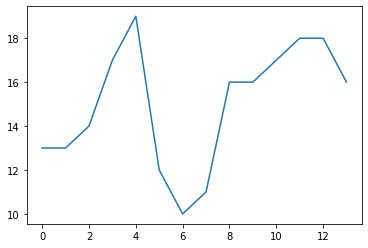

In [148]:
s.plot()

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 1 Axes>

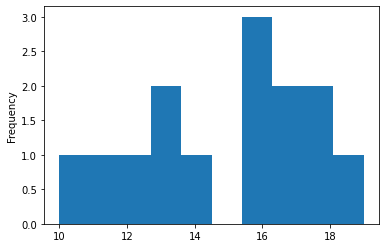

In [149]:
s.plot.hist()

In [152]:
# Ask pandas to read the HTML on this Wikipedia page
# it stores a list of Pandas "data frames"
all_dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')

In [153]:
all_dfs[2]

Country/Territory 
 Subregion 
 Region 
 IMF[1] 
 United Nations[12] 
 World Bank[13][14] 
 
 
 
 Country/Territory 
 Subregion 
 Region 
 Estimate 
 Year 
 Estimate 
 Year 
 Estimate 
 Year 
 
 
 
 
 0 
 United States 
 Northern America 
 Americas 
 22939580.0 
 2021 
 20893746.0 
 2020 
 20936600.0 
 2020 
 
 
 1 
 China 
 Eastern Asia 
 Asia 
 16862979.0 
 [n 2]2021 
 14722801.0 
 [n 3]2020 
 14722731.0 
 2020 
 
 
 2 
 Japan 
 Eastern Asia 
 Asia 
 5103110.0 
 2021 
 5057759.0 
 2020 
 4975415.0 
 2020 
 
 
 3 
 Germany 
 Western Europe 
 Europe 
 4230172.0 
 2021 
 3846414.0 
 2020 
 3806060.0 
 2020 
 
 
 4 
 United Kingdom 
 Northern Europe 
 Europe 
 3108416.0 
 2021 
 2764198.0 
 2020 
 2707744.0 
 2020 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 211 
 Kiribati 
 Micronesia 
 Oceania 
 232.0 
 2021 
 181.0 
 2020 
 200.0 
 2020 
 
 
 212 
 Palau 
 Micronesia 
 Oceania 
 208.0 
 2021 
 264.0 
 2020 
 268.0 
 2019 
 
 
 213 
 Nauru 
 Micronesia 
 Oceania 
 133.0 
 2021 
 135.0 
 2020 
 118.0 
 2019 
 
 
 214 
 Montserrat 
 Caribbean 
 Americas 
 NaN 
 NaN 
 68.0 
 2020 
 NaN 
 NaN 
 
 
 215 
 Tuvalu 
 Polynesia 
 Oceania 
 65.0 
 2021 
 55.0 
 2020 
 49.0 
 2020 
 
 
 
 216 rows × 9 columns